# Evalution and Analysis

## Imports:

In [73]:
from pathlib import Path

## Get predictions and metrics:

In [74]:
from Helper.evaluation_helpers import get_predictions, calc_metrics

In [75]:
import numpy as np
from pathlib import Path

predsPath = Path('../Predictions/')
for i in list(predsPath.glob('*.npy')):
    data = np.load(i)
    print(f" {i.name} has {len(data)} values")  # Show length of each prediction file


 ARDL.npy has 48 values
 ARIMA1990.npy has 12 values
 ARIMA2000.npy has 12 values
 ARIMAX1990.npy has 12 values
 ARIMAX2000.npy has 12 values
 GRU.npy has 48 values
 LSTM.npy has 12 values
 MLR.npy has 48 values
 Naive.npy has 48 values
 NBEATSx.npy has 12 values
 NHITS.npy has 12 values
 RNN.npy has 48 values
 SARIMA1990.npy has 12 values
 SARIMA2000.npy has 12 values
 SARIMAX1990.npy has 12 values
 SARIMAX2000.npy has 12 values
 Tide.npy has 12 values
 VAR.npy has 12 values
 XGB.npy has 48 values


## Supress warnings

In [76]:
import warnings
warnings.filterwarnings("ignore") 

In [77]:
predsPath= Path('../Predictions/')
predsDf=get_predictions(predsPath)
display(predsDf)

,ground_truth,ARDL,ARIMA1990,ARIMA2000,ARIMAX1990,ARIMAX2000,GRU,LSTM,MLR,Naive,NBEATSx,NHITS,RNN,SARIMA1990,SARIMA2000,SARIMAX1990,SARIMAX2000,Tide,VAR,XGB
observation_date,,,,,,,,,,,,,,,,,,,,
01/2024,122.115,105.785040,121.865489,121.865276,121.828587,121.860320,105.829611,84.773857,106.121323,105.69,121.846504,121.996834,104.281672,121.830877,121.825091,121.811013,121.845030,114.729646,121.824037,99.749580
02/2024,122.494,105.785040,122.135733,122.162382,122.201818,122.251198,105.706756,84.909946,106.247963,105.69,122.120865,122.189484,104.457531,122.078725,122.064401,122.201975,122.224498,114.524286,122.067432,99.746429
03/2024,122.912,105.785040,122.405977,122.474494,122.580599,122.653228,105.610172,84.906305,106.374603,105.69,122.287407,122.523796,104.824764,122.329628,122.305672,122.509162,122.548902,117.669660,122.312133,99.712273
04/2024,123.234,105.860227,122.676221,122.793262,122.980798,123.060701,105.606261,84.906496,106.501243,105.69,122.503059,122.811935,104.821798,122.615530,122.588610,122.895298,122.938665,114.174393,122.514352,99.663704
05/2024,123.224,106.270458,122.946465,123.114981,123.198546,123.264980,105.784633,84.906481,106.627884,105.69,122.831955,123.056259,104.224776,122.893196,122.859555,123.050231,123.090847,118.744287,122.671505,99.684586
06/2024,123.369,106.605603,123.216709,123.438010,123.345934,123.383008,106.306930,84.906478,106.754524,105.69,123.020706,123.217255,103.860601,123.105805,123.057705,123.196305,123.231504,118.153222,122.806310,99.715691
07/2024,123.575,106.960277,123.486953,123.761619,123.590490,123.589756,107.032476,84.906474,106.881164,105.69,123.285072,123.438248,104.139605,123.456398,123.410391,123.448668,123.468821,116.292331,122.942020,99.713470
08/2024,123.727,107.328459,123.757197,124.085487,123.691117,123.659495,107.305849,84.906470,107.007804,105.69,123.524452,123.640480,104.416921,123.746242,123.696499,123.623750,123.620677,117.122861,123.093045,99.719124
09/2024,123.939,107.671517,124.027441,124.409468,123.748932,123.674133,106.828919,84.906466,107.134444,105.69,123.663605,123.933266,104.493026,124.029698,123.976322,123.704845,123.692794,115.691279,123.265874,99.715660


# Calculate Metrics:

In [78]:
# metric DataFrames are sorted by the main metric before being displayed
main_metric = 'RMSE'

## Horizon = 1

In [79]:
# WARNING: r2 is not well defined for less than 2 samples
metrics_1= calc_metrics(predsDf, horizon=1).drop('r2', axis=1)
display(metrics_1.sort_values(main_metric, axis=0))

,RMSE,MAE
NHITS,0.118166,0.118166
ARIMA1990,0.249511,0.249511
ARIMA2000,0.249724,0.249724
ARIMAX2000,0.25468,0.25468
NBEATSx,0.268496,0.268496
SARIMAX2000,0.26997,0.26997
SARIMA1990,0.284123,0.284123
ARIMAX1990,0.286413,0.286413
SARIMA2000,0.289909,0.289909
VAR,0.290963,0.290963


## Horizon = 3

In [80]:
metrics_3= calc_metrics(predsDf, horizon=3)
display(metrics_3.sort_values(main_metric, axis=0))

,RMSE,MAE,r2
ARIMAX2000,0.252176,0.252085,0.399803
NHITS,0.292914,0.270295,0.190218
ARIMAX1990,0.30399,0.303332,0.127819
SARIMAX2000,0.304059,0.300857,0.127424
SARIMAX1990,0.336633,0.33295,-0.069552
ARIMA2000,0.348207,0.339616,-0.14436
ARIMA1990,0.385863,0.371267,-0.40525
SARIMA1990,0.444348,0.427257,-0.863526
NBEATSx,0.447749,0.422075,-0.892154
VAR,0.456968,0.439133,-0.970881


## Horizon = 6

In [81]:
metrics_6= calc_metrics(predsDf, horizon=6)
display(metrics_6.sort_values(main_metric, axis=0))

,RMSE,MAE,r2
ARIMAX2000,0.192651,0.16409,0.817058
ARIMAX1990,0.238929,0.201953,0.71861
SARIMAX2000,0.25859,0.244759,0.670393
NHITS,0.284809,0.25874,0.600165
SARIMAX1990,0.292889,0.280669,0.577158
ARIMA2000,0.309473,0.272936,0.527917
ARIMA1990,0.378155,0.350234,0.295126
SARIMA1990,0.438472,0.415707,0.052333
SARIMA2000,0.462329,0.441161,-0.053598
NBEATSx,0.484891,0.456251,-0.158941


## Horizon = 12

In [82]:
metrics_12= calc_metrics(predsDf, horizon=12)
display(metrics_12.sort_values(main_metric, axis=0))

,RMSE,MAE,r2
NHITS,0.208529,0.161159,0.919329
SARIMAX2000,0.258796,0.242079,0.875749
ARIMAX1990,0.261509,0.215859,0.873131
SARIMAX1990,0.269689,0.25457,0.865069
ARIMA1990,0.278222,0.22374,0.856396
ARIMAX2000,0.309131,0.242368,0.822716
SARIMA1990,0.33694,0.285122,0.789385
SARIMA2000,0.344726,0.28355,0.779538
ARIMA2000,0.419849,0.374905,0.672983
NBEATSx,0.420651,0.394381,0.671732


# Analysis:

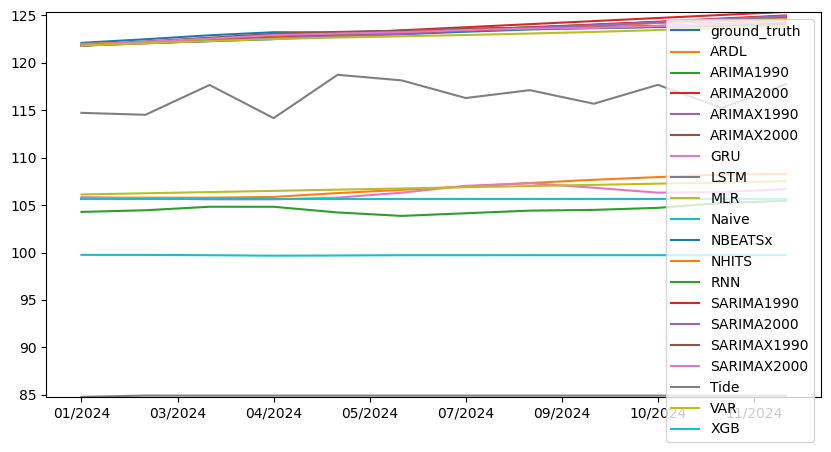

In [83]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.locator_params(axis='x', nbins=10)

for model in predsDf.columns:
    plt.plot(predsDf.index, predsDf[model])

plt.ylim(predsDf.drop('ARDL', axis=1).min(axis=0).min(), predsDf.drop('ARDL', axis=1).max(axis=0).max())
plt.legend(predsDf.columns)
plt.show()

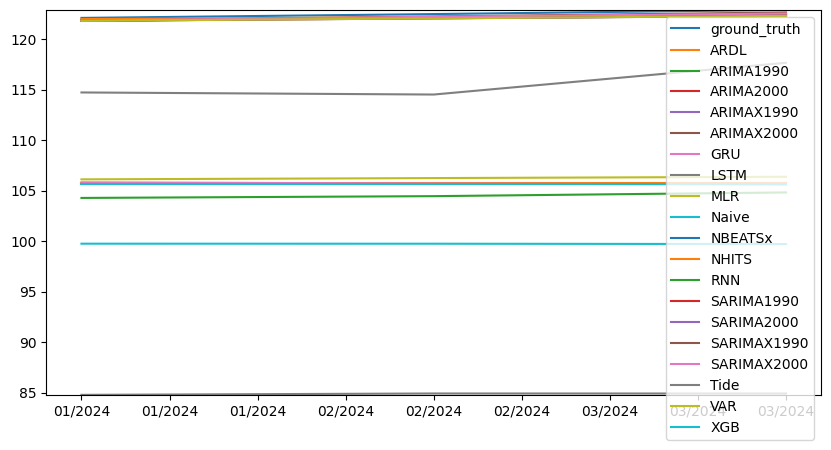

In [84]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.locator_params(axis='x', nbins=10)

for model in predsDf.columns:
    plt.plot(predsDf.index[:int(len(predsDf)/4)], predsDf[model][:int(len(predsDf)/4)])

plt.ylim(predsDf[:int(len(predsDf)/4)].drop('ARDL', axis=1).min(axis=0).min(), predsDf[:int(len(predsDf)/4)].drop('ARDL', axis=1).max(axis=0).max())
plt.legend(predsDf.columns)
plt.show()